# Report


**Group 19**
1. Claris Toh, 2203422
2. Goh Shuang Claire, 2202682
3. Hoe Jessaryn, 2201938
4. Teo Hui Xin Mandy, 2202282
5. Ong Wei Song Jodie, 2202101





## Abstract

The use of chatbots in education is changing how institutions communicate with the public, and can provide immediate support by answering students’ questions. This project aims to optimise the process of learning data structure algorithm (DSA) by utilising a chatbot that provides instantaneous assistance and automates interactive learning amongst students. To filter out non DSA-related queries and make sure the conversations are on track, the chatbot makes use of Ollama LLM and semantic similarity techniques. If the user asks any non DSA-related questions, the chatbot has a polite error handling mechanism where it prompts the user with a message. The front-end design makes use of the Gradio interface. In addition, an image recognition feature is employed where users get to upload an image regarding DSA questions and the chatbot will provide relevant feedback. Lastly, the Co-Star framework is being used to organise prompts and ensure that discussions are smooth and well-structured.

## Methodology

The chatbot uses the Sentence Transformer (SBERT) model “paraphrase-MiniLM-L6-v2” to determine if user prompts are related to DSA. It enhances the response quality and restricts the response to DSA topics. The chatbot also accepts image prompts, allowing users to submit visual content for assistance. To maintain conversational flow, it also incorporates features such as history logging and contextual memory, which allow personalised interactions and provide coherent responses based on previous exchanges.
hello text here

### Setup and Dependencies



The implementation of this methodology requires the following tools and libraries


1. Tesseract-OCR

    Tesseract is an open-source OCR engine used to recognise text from images. This is installed in the program to provide the core OCR functionalities that pytesseract will utilise.


2. pytesseract

   Pytesseract is a python wrapper for Tesseract-OCR, which allows access to its functions directly using python. This library is installed to interact with the Tesseract engine to convert images into strings by extracting any recognisable text it may contain.

3. PIL (pillow)

   Pillow is the Python Imaging Library, used for opening, manipulating and saving different image file formats. This is used to handle image files uploaded via the Gradio interface, preparing them for OCR processing done by pytesseract.

4. Torch

  Torch is an open-source machine learning library used for creating deep neural networks. In this project, it is used to compute cosine similarity and calculate the maximum similarity score between embeddings, enabling efficient comparison of user input with DSA-related topics.

5. sentence_transformers

  The Sentence Transformer (SBERT) library is used to generate embeddings that capture the semantic meaning of entire sentences. This allows the chatbot to compare user input with predefined DSA topics and determine their relevance.





### Prompt Design

To restrict the chatbot to only DSA topics, thus the prompt design approach was used. SBERT is employed for semantic similarity checking to filter out non-DSA-related queries, ensuring only relevant prompts are addressed. After the prompts are validated as DSA-related, the Co-Star framework guides the chatbot’s responses, ensuring they are structured, beginner-friendly, and aligned with the student learning’s objectives.


### Prompt instruction

Since the chatbot is based on **Ollama**, initial instructions are provided to ensure it only answers DSA-related queries, These instructions explicitly tells the chatbot to focus on DSA topics and avoiding providing off-topic information.



```
Chatbot: Hello! I am a chatbot that specializes in Data Structures and Algorithms (DSA).
I will not answer questions outside of DSA, and if you ask something unrelated, I will remind you that I can only discuss DSA topics.
I will not provide off-topic informations other than DSA topics
```



### **Prompt filtering**

The chatbot uses the SBERT model “paraphrase-MiniLM-L6-v2” to check if the user prompts are related to DSA topics by comparing them against a list of preset sentences.

**is_input_related_to_dsa(user_input)**

This function helps the chatbot to determine if the user’s prompt is relevant to DSA topics by calculating the semantic similarity between the input and a predefined list of DSA-related sentences.


The function takes the user's input and a list of predefined DSA-related sentences and then converts both into embeddings using the SBERT model’s encoding. These embeddings capture the semantic meaning of the input and the reference sentences. Next, it computes using PyTorch’s cosine similarity between the user's input and the DSA sentence embeddings. Cosine similarity measures how alike two vectors are, with values closer to 1 indicating a higher similarity. The threshold is set to define the grey areas of the prompts, if the maximum similarity score between the user’s input and DSA-related sentence exceeds the threshold (in this case, preset to 0.5), the prompt is considered DSA-related. Otherwise, it is deemed irrelevant or off-topic.


```
def is_input_related_to_dsa(user_input):
    # Compute embedding for the user input
    user_input_embedding = model.encode(user_input)

    # Compute cosine similarity between the user input and DSA topics
    cosine_scores = util.pytorch_cos_sim(user_input_embedding, dsa_reference_embeddings)

    # Get the highest similarity score
    max_score = torch.max(cosine_scores).item()
    #print(f"Max similarity score: {max_score}")

    # Define threshold for relevance (you can adjust this)
    return max_score > 0.5
```




### Prompt Reponse

After passing both the instruction and filtering stages, the chatbot was guided by the **CO-STAR framework** on how it should respond, with the understanding of its own **context, objective, style, tone, and audience**, resulting in structured, beginner-friendly answer aligned with the student’s learning needs.

```
Chatbot's Context:
The student is learning about data structure algorithms to better understand the content.

Chatbot's Objective:
Assist the student in their learning journey for data structure algorithms only, ensuring a focus on topics relevant to DSA.

Chatbot's Style:
Conversational and beginner-friendly.

Chatbot's Tone:
Supportive and encouraging, helping the student feel confident while learning complex concepts.

Chatbot's Audience:
Information and Communication Technologies (ICT) students that are preparing for Online Assessments and Integrated Work Study Programme (IWSP) interviews, so responses should be clear and easy to follow.

Chatbot's Response:
Provide a step-by-step guide with a simple code example to explain the concept.
```


### Conversation Logging and Contextual Awareness for User Interaction

To enhance the user experience and deepen understanding, the chatbot employs conversation logging and contextual awareness, which allows it to propose follow-up questions based on the user’s previous input. These feature works as follows:

The chatbot analyses the user's past interactions to identify the topic at hand and maintain a contextual awareness of the conversation, ensuring that it stays coherent and relevant. Even if the topics covered in the conversation vary, the chatbot will still adjust thanks to its dynamic tracking. The chatbot will continue to update its understanding as the user interacts, refining its perception of the current topic based on new input. By making use of the logged history, the chatbot will propose follow-up questions with its vast amount of knowledge that aligns with the identified topic. This allows the chatbot to understand and remember the context of the conversation. With the ability to store the history of the conversations, the chatbot can provide meaningful and coherent multi-turn responses to DSA queries from the users.

```
def chatbot_response(user_input, history, image=None):
    """
    Processes user's input or image, appends history, invokes the LLM to generate a response,
    and ensures the conversation remains focused on DSA topics.
    """
    extracted_text = None

    # If an image is provided, extract text from the image
    if image is not None:
        extracted_text = ocr_from_image(image)
        user_input = f"Extracted text from image: {extracted_text}"

    # Combine the history and the new user input
    history_prompt = "\n".join([f"User: {msg}" if user_msg else f"Chatbot: {bot_msg}" for user_msg, bot_msg in history])

    # Append the new user message to the history
    history_prompt += f"\nUser: {user_input}"


    # Generate response from the LLM
    response = llm.invoke(history_prompt)

    return response, extracted_text
```


The chatbot logs all user interactions, including both questions asked by the user and responses provided by the chatbot, to a CSV file. The CSV file acts as a record, capturing the user's and chatbot's complete interaction history. This ensures that every question, response, and engagement is documented for further analysis or review. In addition, users could download the CSV file to their local machine for future reference.


### Image upload

In the chatbot, the image upload function enables users to provide images as input, enhancing the interactive experience by incorporating optical character recognition (OCR) capabilities. This feature broadens the scope of user interactions, making the chatbot a more versatile and useful educational tool.



1.   **ocr_from_image**
```
def ocr_from_image(image):
      """
      This function uses pytesseract to extract text from an uploaded image.
      Since Gradio gives a PIL image object, no need to open the image again.
      """
      text = pytesseract.image_to_string(image)
      return text
```
    This function is designed to extract text from the image uploaded by the user. The function will take in one argument (PIL image object) which is provided by the user via the Gradio interface’s image upload component. The function calls** pytesseract.image_to_string** of pytesseract to process the image, recognise any text present, and convert it into a string which is the output.  


2.   **chatbot_response**
```
def chatbot_response(user_input, history, image=None):
      extracted_text = None

      # If an image is provided, extract text from the image
      if image is not None:
          extracted_text = ocr_from_image(image)
          user_input = f"Extracted text from image: {extracted_text}"

      # Combine the history and the new user input
      history_prompt = "\n".join([f"User: {msg}" if user_msg else f"Chatbot: {bot_msg}" for user_msg, bot_msg in history])

      # Append the new user message to the history
      history_prompt += f"\nUser: {user_input}"

      # Generate response from the LLM
      response = llm.invoke(history_prompt)

      return response, extracted_text
```

This function handles user inputs, which can be either text of image inputs. For images, it utilises **ocr_from_image** function to extract text before processing it further.
The function takes two parameters which is text directly entered by the user, and image which is optional uploaded by the user. If an image is provided, the function will call **ocr_from_image** to convert the image to text. The extracted text is then prefixed to the user’s text input, if any, to form the complete prompt. The combined input is passed to llm.invoke which generates a response based on the input.
The function returns a tuple containing the response from the language model and the text extracted from the image (if any). This allows the bot to display both the OCR result and the chatbot's response in the user interface.






## Results

Prompts in the chatbot provide a specific direction for the chatbot to work towards, allowing it to produce more relevant and accurate responses. The chatbot assesses the relevance of the user’s inquiries to DSA using a similarity score mechanism. There are various prompts that the chatbot will evaluate and respond to:


1. Informal DSA Query (Accept)

  Prompts that are casual but still relevant to DSA topics will be accepted by the chatbot. This may include greetings that are phrased informally but lead to valid DSA-related discussions.

  prompt used: Hi! What is Binary Search?
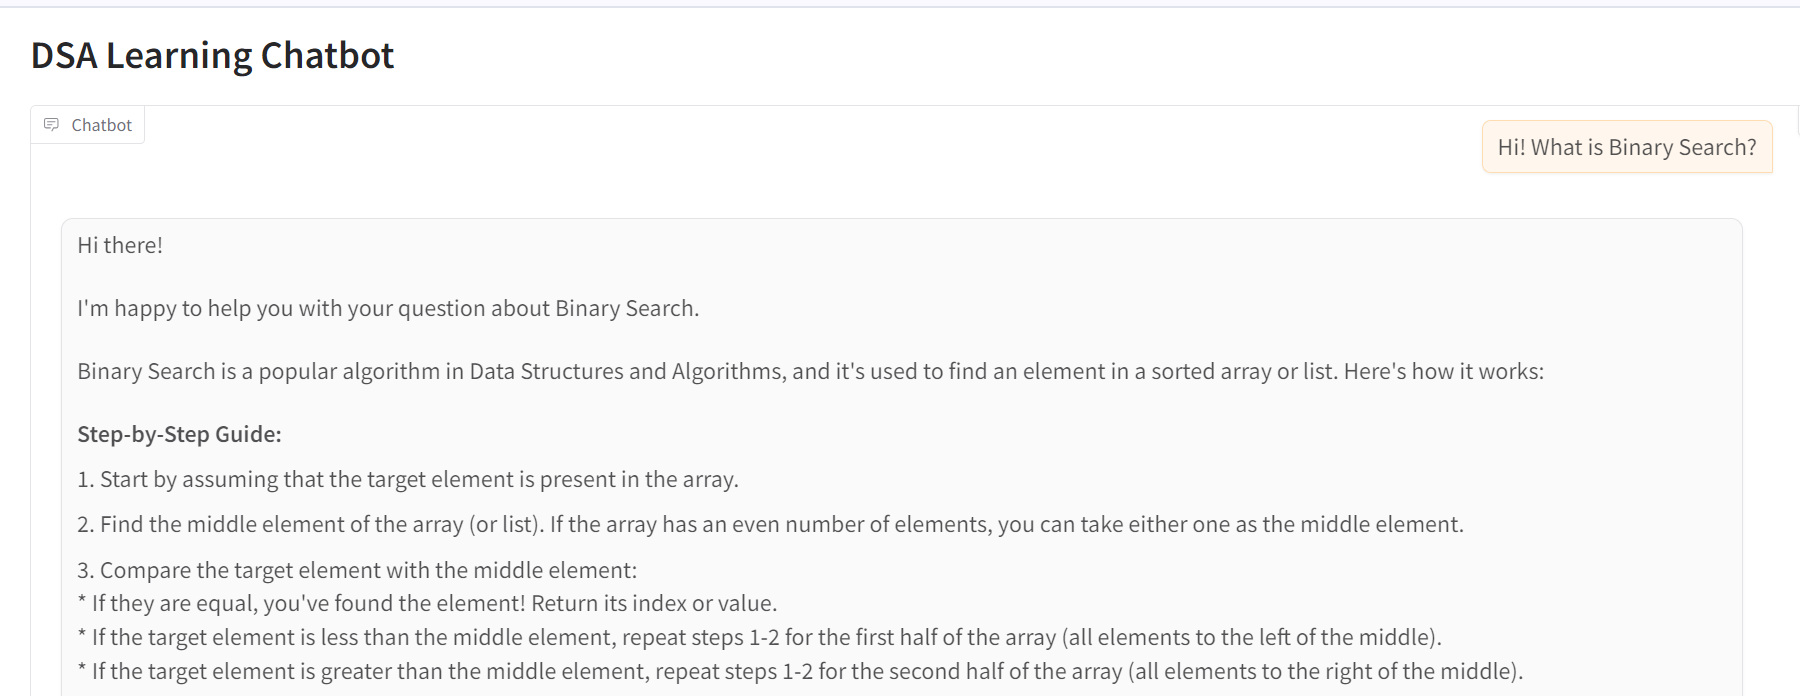

2. Relevant DSA Query (Accept)

  Prompts that are directly related to DSA topics such as questions that are related to algorithms, data structures or other concepts will be accepted by the chatbot and provide relevant answers.
  
  prompt used: Yes,i want to know what is the time complexity of Binary Search
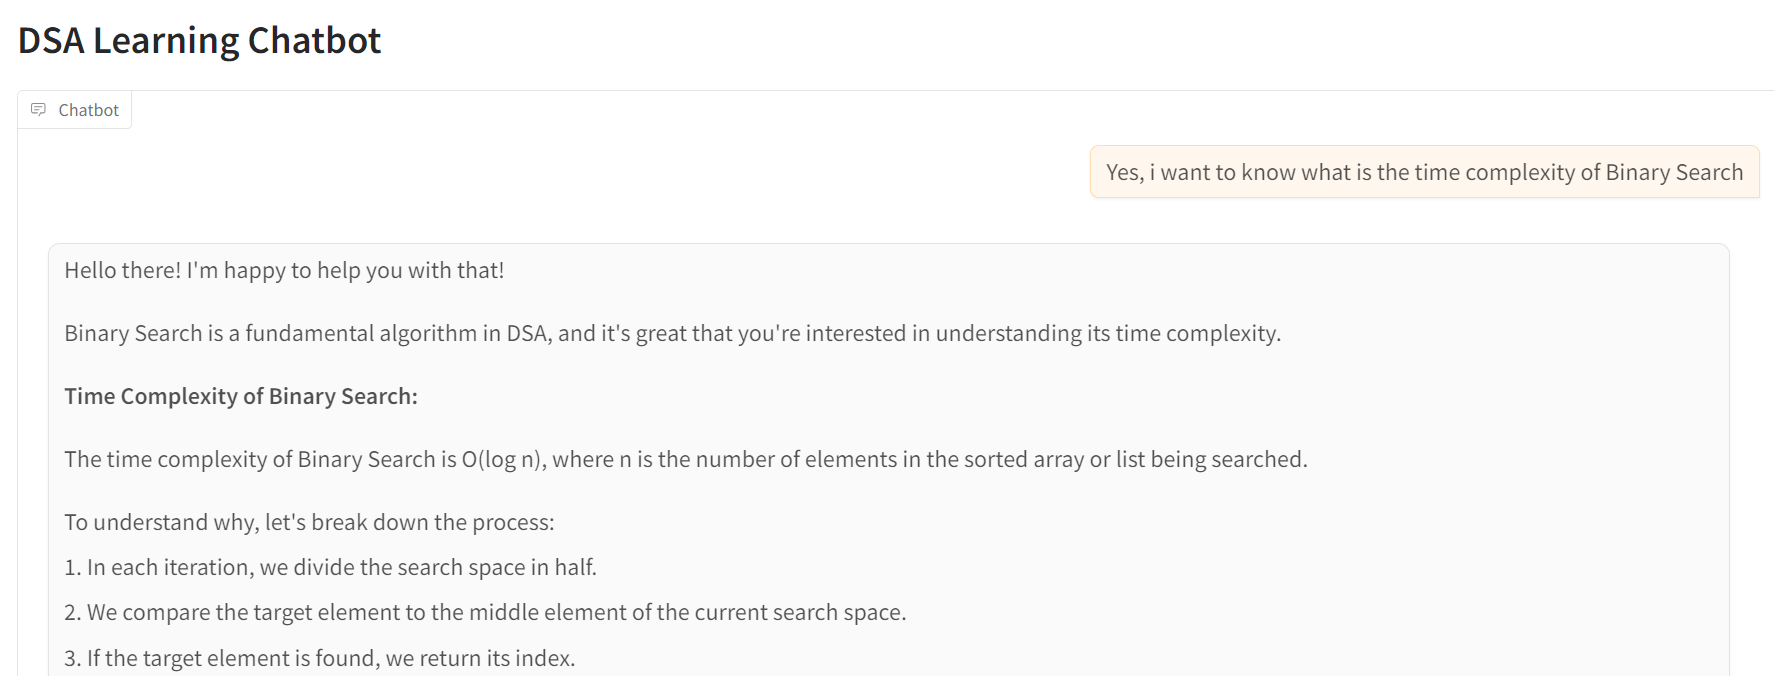

3. Unrelated DSA Query (Reject)

  Prompts that are irrelevant to DSA topics should be politely rejected by the chatbot. The chatbot should direct the question back to a DSA-related topic and only answer DSA related questions.

  prompt used: Who is Ariana Grande?
  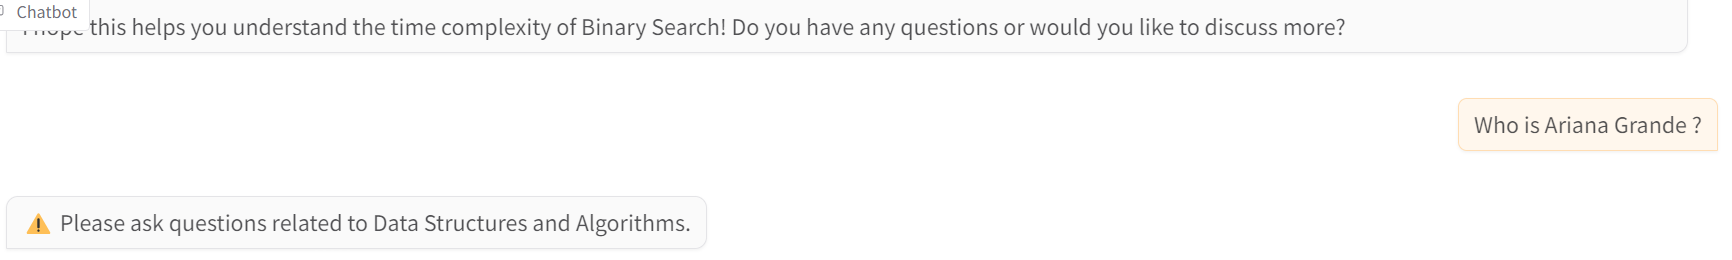

4. Mixed Query (Partial Accept/Reject)

  Prompts that are not directly related to DSA but mentions ‘DSA” in the question. The chatbot will reject the off topic portion but address the DSA-related part of the query.

   prompt used: Can you help me decide what for lunch by using binary search in a list
   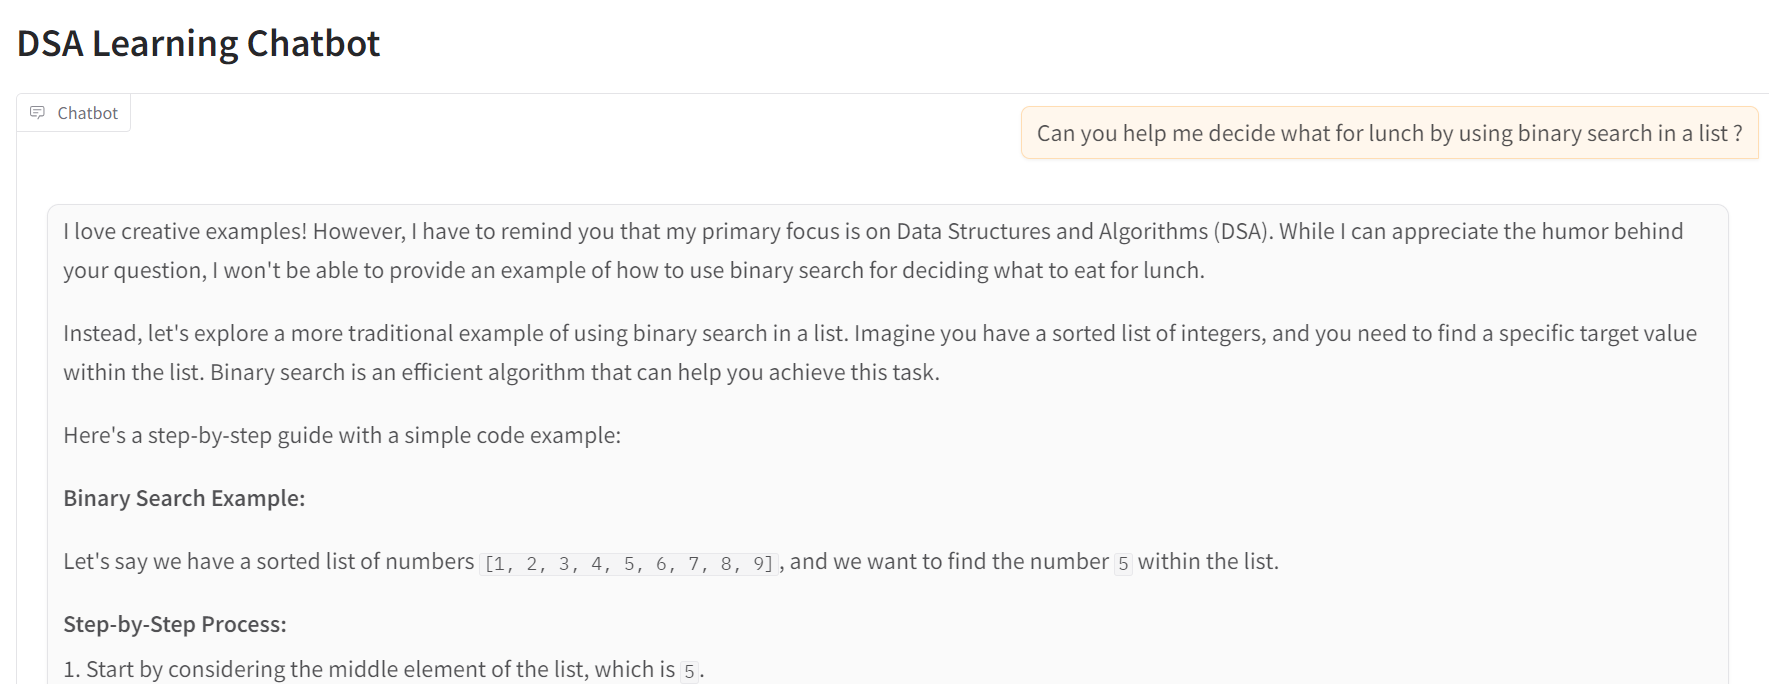







## Conclusion

In conclusion, the DSA learning chatbot makes use of various techniques such as prompt filtering, semantic similarity checks, polite error handling, and dynamic response generation through Ollama LLM.  This ensures that the chatbot stays on track with the relevant DSA topic. By leveraging the different features, it is an efficient tool in the automatization for interactive learning in DSA. In addition, to elevate the utility and performance of the chatbot, the chatbot employs the Gradio interface, alongside features like image recognition and conversation logging. With all the various functions, the chatbot will enhance learning and support a deeper understanding of DSA concepts among students.

## References

1. SBERT: https://huggingface.co/sentence-transformers/paraphrase-MiniLM-L6-v2
2. Tesseract -OCR: https://github.com/tesseract-ocr/tesseract.git
3. Pytesseract: https://pypi.org/project/pytesseract/
4. Pillow: https://pillow.readthedocs.io/en/stable/
5. Co-star framework: https://medium.com/@thomasczerny/co-star-framework-for-prompt-structuring-7f9a8c221224

# ChatBot

## Install Ollama, Langchain, Torch, Sentence-transformers and Tesseract

In [ ]:
!curl -fsSL https://ollama.com/install.sh | sh
!pip install langchain_community gradio
!pip install -U  sentence-transformers
!pip install torch

>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
############################################################################################# 100.0%
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.


In [ ]:
# Install Tesseract
!apt-get update
!apt-get install -y tesseract-ocr
!apt-get install -y libtesseract-dev

# Install pytesseract
!pip install pytesseract

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Ign:9 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:11 https://r2u.stat.illinois.edu/ubuntu jammy Release
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading pack

## Start Ollama server as a background process and pull llama3 image.

In [ ]:
import subprocess
process = subprocess.Popen(["ollama", "serve"])

In [ ]:
!ollama list

NAME             ID              SIZE      MODIFIED       
llama3:latest    365c0bd3c000    4.7 GB    21 minutes ago    


In [ ]:
!ollama pull llama3

pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠦ pulling manifest ⠧ pulling manifest ⠇ pulling manifest ⠏ pulling manifest 
pulling 6a0746a1ec1a... 100% ▕▏ 4.7 GB                         
pulling 4fa551d4f938... 100% ▕▏  12 KB                         
pulling 8ab4849b038c... 100% ▕▏  254 B                         
pulling 577073ffcc6c... 100% ▕▏  110 B                         
pulling 3f8eb4da87fa... 100% ▕▏  485 B                         
verifying sha256 digest 
writing manifest 
success 


## Expose the port

In [ ]:
from google.colab.output import eval_js
notebook_url = eval_js("google.colab.kernel.proxyPort(11434)")

In [ ]:
!export OLLAMA_HOST=notebook_url

In [ ]:
from langchain_community.llms import Ollama
llm = Ollama(model="llama3")

## Import libraries such as pytes, gradio and torch, and sbret


In [ ]:
import gradio as gr
import csv
from google.colab import files
from PIL import Image
import pytesseract

# Configure pytesseract to use the installed Tesseract binary
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

In [ ]:
from sentence_transformers import SentenceTransformer, util
import torch

# Load the model from Hugging Face (SBert)
model = SentenceTransformer('sentence-transformers/paraphrase-MiniLM-L6-v2')

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


## Logging Chat History

In [ ]:
# File to store conversation logs
csv_filename = "chat_logs.csv"

# Function to log conversations to a CSV file
def log_to_csv(user_input, bot_response, extracted_text=None):
    """Logs the user input (or extracted text from image) and chatbot response to a CSV file."""
    with open(csv_filename, mode='a', newline='') as file:
        writer = csv.writer(file)
        if extracted_text:
            writer.writerow([f"Image text: {extracted_text}", bot_response])
        else:
            writer.writerow([user_input, bot_response])

# Function to download the CSV file when the "Download Logs" button is clicked
def download_logs():
    files.download(csv_filename)

## Image Function

In [ ]:
# Function to handle OCR and convert image to text
def ocr_from_image(image):
    """
    This function uses pytesseract to extract text from an uploaded image.
    Since Gradio gives a PIL image object, no need to open the image again.
    """
    text = pytesseract.image_to_string(image)
    return text


## Preset Instructions and Topics

In [ ]:
# Initialize the preset instruction
preset_instruction = """
Chatbot's Context:
The student is learning about data structure algorithms to better understand the content.

Chatbot's Objective:
Assist the student in their learning journey for data structure algorithms only, ensuring a focus on topics relevant to DSA.

Chatbot's Style:
Conversational and beginner-friendly.

Chatbot's Tone:
Supportive and encouraging, helping the student feel confident while learning complex concepts.

Chatbot's Audience:
Information and Communication Technologies (ICT) students that are preparing for Online Assessments and Integrated Work Study Programme (IWSP) interviews, so responses should be clear and easy to follow.

Chatbot's Response:
Provide a step-by-step guide with a simple code example to explain the concept.

Chatbot: Hello! I am a chatbot that specializes in Data Structures and Algorithms (DSA).
I will not answer questions outside of DSA, and if you ask something unrelated, I will remind you that I can only discuss DSA topics.
I will not provide off-topic informations other than DSA topics
"""

# Initialize the preset topic
# List of DSA-related reference sentences with generic follow up questions
dsa_reference_sentences = [
    # Core DSA topics and questions
    "DSA",
    "Data Structures",
    "Algorithms",
    "What is a binary search tree?",
    "How does sorting algorithms work?",
    "Can you explain graph theory?",
    "What is a linked list?",
    "How do hash tables work?",
    "Can you explain dynamic programming?",
    "What is recursion in algorithms?",
    "What is a stack in data structures?",
    "What is a queue?",
    "How does a heap work?",
    "What is a priority queue?",
    "How do graphs represent relationships?",
    "What is an adjacency matrix?",
    "What is an adjacency list?",
    "Can you explain breadth-first search?",
    "What is depth-first search?",
    "What is a binary heap?",
    "How does a Trie work?",
    "Can you explain AVL trees?",
    "What is a Red-Black Tree?",
    "What is the knapsack problem in algorithms?",
    "Can you explain greedy algorithms?",
    "How does a minimum spanning tree work?",
    "What is Kruskal's algorithm?",
    "How does Prim's algorithm work?",
    "What is Dijkstra's algorithm?",
    "How does the Bellman-Ford algorithm work?",
    "What is the Floyd-Warshall algorithm?",
    "What is topological sorting?",
    "How does a Fibonacci heap work?",
    "Can you explain a Splay Tree?",
    "What is a Segment Tree?",
    "How does a Fenwick Tree work?",
    "What is radix sort?",
    "Can you explain bucket sort?",
    "What is counting sort?",
    "How does shell sort work?",
    "What is the quickselect algorithm?",
    "Can you explain the KMP algorithm?",
    "How does the Z algorithm work for pattern matching?",
    "What is the Rabin-Karp algorithm?",
    "Can you explain the longest common subsequence?",
    "What is the longest increasing subsequence?",
    "How does a union-find or disjoint set work?",
    "Can you explain ternary search?",
    "What is Manacher's algorithm?",
    "How do you solve the 2-SAT problem?",
    "How does the Ford-Fulkerson algorithm work?",
    "What is the Edmonds-Karp algorithm?",
    "How do graph coloring algorithms work?",
    "Can you explain Tarjan's algorithm?",
    "What is Kosaraju's algorithm?",
    "Can you explain backtracking algorithms?",
    "What is divide and conquer?",
    "How does matrix chain multiplication work?",
    "What is heap sort?",
    "Can you explain the Travelling Salesman Problem?",
    "What are the shortest path algorithms?",
    "What is a circular linked list?",
    "How do doubly linked lists work?",
    "What are sparse matrices?",
    "Can you explain skip lists?",

    # Generic follow-up questions
    "Can you explain more?",
    "Can you give me more details?",
    "How is this better?",
    "Why is this approach used?",
    "Can you show me another example?",
    "What happens in the worst-case scenario?",
    "Why should I use this algorithm?",
    "How can I improve this?",
    "Can you clarify this concept?",
    "How does this compare to another algorithm?",
    "Why is this faster?",
    "Is there another way to implement this?",
    "Can you help me understand the time complexity?",
    "What’s the space complexity for this?",
    "How is this different from another method?",
    "Why does this algorithm work better in some cases?",
    "Could you show me a practical example?",
    "Why should I choose this approach?",
    "Can this be optimized further?",
    "What is the next step after this?",
    "Can we solve this in a different way?",
    "Is there an easier method to solve this problem?",
    "Can you walk me through this process again?",
    "How does this help in real-world applications?"
]

## SBERT [paraphrase-MiniLM-L6-v2](https://huggingface.co/sentence-transformers/paraphrase-MiniLM-L6-v2)

In [ ]:
# Assuming there's an existing model to compute embeddings
dsa_reference_embeddings = model.encode(dsa_reference_sentences)

# Function to check if user input is related to DSA using SBERT
def is_input_related_to_dsa(user_input):
    # Compute embedding for the user input
    user_input_embedding = model.encode(user_input)

    # Compute cosine similarity between the user input and DSA topics
    cosine_scores = util.pytorch_cos_sim(user_input_embedding, dsa_reference_embeddings)

    # Get the highest similarity score
    max_score = torch.max(cosine_scores).item()
    #print(f"Max similarity score: {max_score}")

    # Define threshold for relevance (you can adjust this)
    return max_score > 0.5

## Chatbot Functions

In [ ]:
# Limitation to chatbot history
limit_history_length = 6  # You can adjust this as needed

In [ ]:
# Function to handle user input (text or image) with history
def chatbot_response(user_input, history, image=None):
    """
    Processes user's input or image, appends history, invokes the LLM to generate a response,
    and ensures the conversation remains focused on DSA topics.
    """
    extracted_text = None

    # If an image is provided, extract text from the image
    if image is not None:
        extracted_text = ocr_from_image(image)
        user_input = f"Extracted text from image: {extracted_text}"

    # Combine the history and the new user input
    history_prompt = "\n".join([f"User: {msg}" if user_msg else f"Chatbot: {bot_msg}" for user_msg, bot_msg in history])

    # Append the new user message to the history
    history_prompt += f"\nUser: {user_input}"


    # Generate response from the LLM
    response = llm.invoke(history_prompt)

    return response, extracted_text


In [ ]:
def user(user_message, history, image=None):
    # If the user enters "exit" or "quit", stop the conversation and download logs
    if user_message.lower() in ["exit", "quit"]:
        return history + [(user_message, "Session ended. Logs downloaded.")], "", None

    # Ensure preset instruction is always first
    if not history or history[0] != (None, preset_instruction):
        history.insert(0, (None, preset_instruction))  # Add preset instruction if not in history

    # If there's an image, proceed directly to chatbot response without using SBERT
    if image is not None:
        bot_message, extracted_text = chatbot_response(user_message, history=history, image=image)
        user_message = user_message if extracted_text is None else f"Image text: {extracted_text}"

    # If no image, check if user input is related to DSA using SBERT
    elif not is_input_related_to_dsa(user_message):
        bot_message = "⚠️ Please ask questions related to Data Structures and Algorithms."

    else:
        # Get the chatbot response when the input is related to DSA
        bot_message, extracted_text = chatbot_response(user_message, history=history)

    # Log the user input and bot response
    log_to_csv(user_message, bot_message)

    # Append the new conversation to history
    history.append((user_message, bot_message))

    # Limit history length if needed (optional)
    max_history_length = limit_history_length
    history = history[-max_history_length:]  # Keep last 6 exchanges

    return history, "", None

## Gradio Interface

In [ ]:
with gr.Blocks() as demo:
    gr.Markdown("# DSA Learning Chatbot")
    chatbot = gr.Chatbot()

    with gr.Tab("Text Query"):
      msg = gr.Textbox(label="Your question here:", placeholder="Ask me about heaps, trees, sorting algorithms, etc.")
    with gr.Tab("Image Query"):
      image_input = gr.Image(type="pil", label="Upload an image")
      send_btn = gr.Button("Send")
      send_btn.click(user, [msg, chatbot, image_input], [chatbot, msg, image_input])
    with gr.Tab("Download Logs"):
      download_btn = gr.Button("Download Logs")


    # Define interaction between the textbox, image input, buttons, and chatbot display

    msg.submit(user, [msg, chatbot, image_input], [chatbot, msg, image_input])
    download_btn.click(download_logs)

/usr/local/lib/python3.10/dist-packages/gradio/components/chatbot.py:222: UserWarning: You have not specified a value for the `type` parameter. Defaulting to the 'tuples' format for chatbot messages, but this is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style 'role' and 'content' keys.
  warnings.warn(


## Demo

In [ ]:
# Launch the Gradio interface
demo.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://e5d19d5b04d5d30add.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


References:
